In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/f5d25f46-5445-4cb5-be13-4d3a3801c0fe')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*application_data.txt'):
        all_filenames.append(f.name)

In [ ]:
folders

In [ ]:
all_filenames

In [3]:
# Open and load the file  
for f in list(set(all_filenames)):
    app_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["application_data"] 
            temp_df = pd.DataFrame(data)
            app_data = app_data.append(temp_df,ignore_index=True)    

In [4]:
app_data

,name,time,timeDate
0,com.miui.home,249860355090073,21.08.2019 16:32:18.622
1,com.miui.home,11749824167547,18.08.2019 22:23:49.436
2,ch.ethz.inf.vs.staals.visualattentionrecorder,11750869910202,18.08.2019 22:23:50.482
3,ch.ethz.inf.vs.staals.visualattentionrecorder,251680220044438,30.08.2019 21:24:32.232
4,com.miui.home,544346395727,18.08.2019 19:17:03.958
...,...,...,...
573,com.facebook.orca,4116917300406,18.08.2019 20:16:36.529
574,com.facebook.orca,4250599978064,18.08.2019 20:18:50.212
575,com.miui.home,4251655048844,18.08.2019 20:18:51.267
576,ch.ethz.inf.vs.staals.visualattentionrecorder,4257990977488,18.08.2019 20:18:57.603


In [5]:
# Sort the values by timeDate
app_data = app_data.sort_values(by=['timeDate'],ignore_index=True)
app_data

,name,time,timeDate
0,com.android.settings,1004164041839345,15.08.2019 22:19:44.825
1,ch.ethz.inf.vs.staals.visualattentionrecorder,1004170943692311,15.08.2019 22:19:51.727
2,com.android.settings,1004180937765484,15.08.2019 22:20:01.721
3,ch.ethz.inf.vs.staals.visualattentionrecorder,1004196676386416,15.08.2019 22:20:17.460
4,com.miui.home,1004416341859665,15.08.2019 22:23:57.126
...,...,...,...
573,com.miui.home,251653181470229,30.08.2019 21:24:05.194
574,ch.ethz.inf.vs.staals.visualattentionrecorder,251655303486478,30.08.2019 21:24:07.316
575,com.android.settings,251656849142363,30.08.2019 21:24:08.862
576,ch.ethz.inf.vs.staals.visualattentionrecorder,251657867932467,30.08.2019 21:24:09.880


In [6]:
# How many different apps?
print(app_data["name"].describe())

count               578
unique               30
top       com.miui.home
freq                222
Name: name, dtype: object


In [ ]:
# Export dataframe to csv file 
app_data.to_csv(r'/shome/ws2021/group9/dataset/cofe_app_data.csv',index=False)

In [7]:
# Start and End time of the data recording
print("Start time Date:",app_data["timeDate"].min())
print("End time Date:",app_data["timeDate"].max())

Start time Date: 15.08.2019 22:19:44.825
End time Date: 30.08.2019 21:24:32.232


In [8]:
# Name of the apps used by the participant
app_names = app_data.name.unique() 
app_names

array(['com.android.settings',
       'ch.ethz.inf.vs.staals.visualattentionrecorder', 'com.miui.home',
       'com.instagram.android', 'com.miui.securitycenter',
       'com.miui.cleanmaster', 'com.google.android.googlequicksearchbox',
       'com.whatsapp', 'com.google.android.youtube', 'com.spotify.music',
       'com.google.android.gm', 'com.android.browser',
       'com.facebook.orca', 'com.Slack',
       'com.android.providers.downloads.ui', 'ro.bcr.georgego',
       'com.android.systemui', 'com.android.camera', 'com.eTokenBCR',
       'com.revolut.revolut', 'com.facebook.katana',
       'com.android.htmlviewer', 'com.android.chrome',
       'com.android.deskclock', 'com.google.android.apps.maps',
       'com.google.android.gms', 'com.miui.gallery', 'com.android.mms',
       'com.android.contacts', 'com.android.vending'], dtype=object)

<AxesSubplot:title={'center':'Frequency of the apps'}>

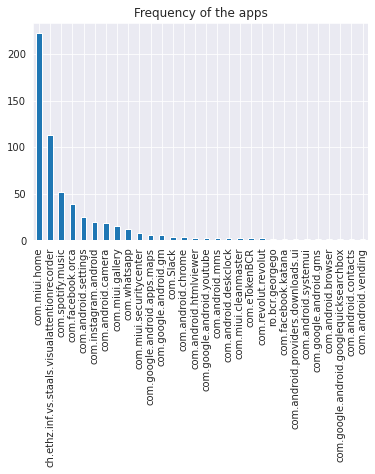

In [9]:
# How many times an app is used?
app_counts = app_data.name.value_counts()
app_counts.plot(kind='bar',title='Frequency of the apps')

     - Spotify is the most used app
     - Facebook is second highest

In [10]:
# Frequent apps
frequent_apps = app_counts[app_counts>=15]
print("The number of most frequent used apps:",len(frequent_apps))

print("The name of most frequent used apps:\n",frequent_apps)

The number of most frequent used apps: 8
The name of most frequent used apps:
 com.miui.home                                    222
ch.ethz.inf.vs.staals.visualattentionrecorder    113
com.spotify.music                                 52
com.facebook.orca                                 39
com.android.settings                              25
com.instagram.android                             20
com.android.camera                                19
com.miui.gallery                                  15
Name: name, dtype: int64


- On average only 8 apps are used on regular basis

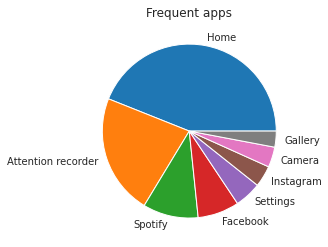

In [11]:
labels='Home','Attention recorder','Spotify','Facebook','Settings','Instagram','Camera','Gallery'
plt.pie(frequent_apps,labels=labels)
plt.title('Frequent apps')
plt.show()

In [9]:
# Exclude attention recorder app
mask = app_data['name'].isin(['ch.ethz.inf.vs.staals.visualattentionrecorder','com.miui.home'])
app_data_m = app_data[~mask]

In [10]:
print(app_data_m['name'].describe())

count                   243
unique                   28
top       com.spotify.music
freq                     52
Name: name, dtype: object


In [11]:
app_counts = app_data_m.name.value_counts()

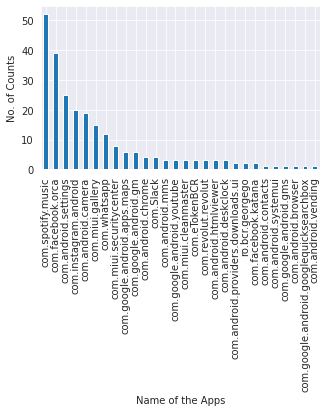

In [15]:
app_counts.plot(kind='bar',xlabel='Name of the Apps', ylabel='No. of Counts',figsize=(5, 3))
plt.savefig('Frequency of the apps_c0fe.jpg',dpi=600,bbox_inches ='tight')
plt.show()

In [14]:
# Frequent apps
frequent_apps = app_counts[app_counts>=15]
print("The number of most frequent used apps:",len(frequent_apps))

print("The name of most frequent used apps:\n",frequent_apps)

The number of most frequent used apps: 7
The name of most frequent used apps:
 com.miui.home            222
com.spotify.music         52
com.facebook.orca         39
com.android.settings      25
com.instagram.android     20
com.android.camera        19
com.miui.gallery          15
Name: name, dtype: int64


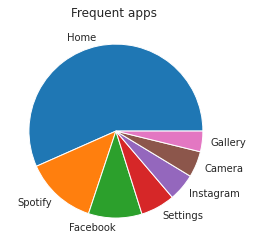

In [16]:
# After excluding attention recorder
labels='Home','Spotify','Facebook','Settings','Instagram','Camera','Gallery'
plt.pie(frequent_apps,labels=labels)
plt.title('Frequent apps ')
plt.show()

In [112]:
# Less frequent apps  
l_frequent_apps = app_counts[(app_counts<15)&(app_counts>2)]

print("Number of less frequent apps which the participant used:",len(l_frequent_apps))
l_frequent_apps

Number of less frequent apps which the participant used: 13


com.whatsapp                    12
com.miui.securitycenter          8
com.google.android.gm            6
com.google.android.apps.maps     6
com.Slack                        4
com.android.chrome               4
com.google.android.youtube       3
com.android.htmlviewer           3
com.android.mms                  3
com.miui.cleanmaster             3
com.android.deskclock            3
com.eTokenBCR                    3
com.revolut.revolut              3
Name: name, dtype: int64

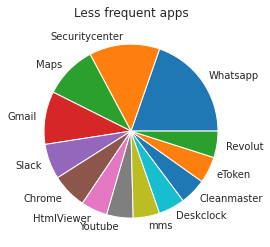

In [115]:
labels='Whatsapp','Securitycenter','Maps','Gmail','Slack','Chrome','HtmlViewer','Youtube','mms','Deskclock','Cleanmaster','eToken','Revolut'
plt.pie(l_frequent_apps,labels=labels)
plt.title('Less frequent apps')
plt.show()

In [13]:
# Apps which are used once
apps_1 = app_counts[app_counts==1]
apps_1

com.android.contacts                       1
com.android.systemui                       1
com.google.android.gms                     1
com.android.browser                        1
com.google.android.googlequicksearchbox    1
com.android.vending                        1
Name: name, dtype: int64

In [14]:
app_1 = app_counts.loc[app_counts==1]
print("The no. of apps which are used once:",sum(app_1))

The no. of apps which are used once: 6


- Contacts, browser are the apps, that are used one time
- 22 apps were not used on a regular basis
- Participant used whatsapp only 12 times in 15 days
- Participant used whatsapp only 3 times in 15 days

### Notification Data

In [116]:
from pathlib import Path

# Find all the folders
root_dir = Path('/shome/ws2021/group9/dataset/f5d25f46-5445-4cb5-be13-4d3a3801c0fe')
folders = [fld for fld in root_dir.iterdir() if fld.is_dir()]

# Find all the file names
all_filenames = []
for fld in folders:
    for f in fld.glob('*notification_data.txt'):
        all_filenames.append(f.name)

In [128]:
# Open and load the file  
for f in list(set(all_filenames)):
    noti_data = pd.DataFrame({}) # An empty dataframe

    for fld in folders:
        if (fld / f).is_file():
           with open(fld /f, 'r') as fp:
            data =  json.load(fp)["notification_data"] 
            temp_df = pd.DataFrame(data)
            noti_data = noti_data.append(temp_df,ignore_index=True)           

In [137]:
print(len(folders))
print(len(all_filenames))

120
120


In [129]:
# Sort the values by timeDate
noti_data = noti_data.sort_values(by=['timeDate'],ignore_index=True)

In [130]:
# Notification_data
noti_data

,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
0,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,1004161784335752,15.08.2019 22:19:42.568,1565900382165
1,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1002,True,1004161922830648,15.08.2019 22:19:42.707,1565900382178
2,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004162289974346,15.08.2019 22:19:43.074,1565900383063
3,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004162797553408,15.08.2019 22:19:43.581,1565900383537
4,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004163116479606,15.08.2019 22:19:43.900,1565900383890
5,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004164130125022,15.08.2019 22:19:44.914,1565900384904
6,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004164522011584,15.08.2019 22:19:45.306,1565900385291
7,removed,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004164545219293,15.08.2019 22:19:45.329,1565900385291
8,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,6820,False,1004164631448512,15.08.2019 22:19:45.415,1565900385401
9,removed,com.google.android.apps.maps,None,None,145029960,False,1004179717980329,15.08.2019 22:20:00.502,1565899627908


In [133]:
# Start and End time of the data recording
print("Start time Date:",app_data["timeDate"].min())
print("End time Date:",app_data["timeDate"].max())

Start time Date: 15.08.2019 22:19:44.825
End time Date: 30.08.2019 21:24:32.232


In [121]:
noti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event       25 non-null     object
 1   package     25 non-null     object
 2   category    4 non-null      object
 3   tag         2 non-null      object
 4   id          25 non-null     int64 
 5   isOngoing   25 non-null     bool  
 6   time        25 non-null     int64 
 7   timeDate    25 non-null     object
 8   timeSensor  25 non-null     int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 1.7+ KB


In [132]:
# Sort the values by timeDate
noti_data = noti_data.sort_values(by=['timeDate'],ignore_index=True)
noti_data


,event,package,category,tag,id,isOngoing,time,timeDate,timeSensor
0,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1001,True,1004161784335752,15.08.2019 22:19:42.568,1565900382165
1,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1002,True,1004161922830648,15.08.2019 22:19:42.707,1565900382178
2,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004162289974346,15.08.2019 22:19:43.074,1565900383063
3,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004162797553408,15.08.2019 22:19:43.581,1565900383537
4,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004163116479606,15.08.2019 22:19:43.900,1565900383890
5,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004164130125022,15.08.2019 22:19:44.914,1565900384904
6,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004164522011584,15.08.2019 22:19:45.306,1565900385291
7,removed,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5475,False,1004164545219293,15.08.2019 22:19:45.329,1565900385291
8,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,6820,False,1004164631448512,15.08.2019 22:19:45.415,1565900385401
9,removed,com.google.android.apps.maps,None,None,145029960,False,1004179717980329,15.08.2019 22:20:00.502,1565899627908


- We only have notifications data of one day

### Merge app and notifications data

In [140]:
# Merge the application and notification data
app_noti_data= pd.merge(app_data,noti_data,on='timeDate',how='outer')

In [141]:
app_noti_data

,name,time_x,timeDate,event,package,category,tag,id,isOngoing,time_y,timeSensor
0,com.android.settings,1.004164e+15,15.08.2019 22:19:44.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ch.ethz.inf.vs.staals.visualattentionrecorder,1.004171e+15,15.08.2019 22:19:51.727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,com.android.settings,1.004181e+15,15.08.2019 22:20:01.721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ch.ethz.inf.vs.staals.visualattentionrecorder,1.004197e+15,15.08.2019 22:20:17.460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,com.miui.home,1.004416e+15,15.08.2019 22:23:57.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
598,NaN,NaN,15.08.2019 22:29:07.754,posted,com.android.systemui,None,None,252119.0,True,1.004727e+15,1.565901e+12
599,NaN,NaN,15.08.2019 22:29:18.810,posted,com.android.providers.contacts,None,None,100.0,True,1.004738e+15,1.565901e+12
600,NaN,NaN,15.08.2019 22:29:19.048,removed,com.android.providers.contacts,None,None,100.0,True,1.004738e+15,1.565901e+12
601,NaN,NaN,15.08.2019 22:30:17.404,posted,android,sys,None,1.0,True,1.004797e+15,1.565901e+12


In [142]:
# Sort the data according to 'timeDate' column
app_noti_data = app_noti_data.sort_values(by=['timeDate'],ignore_index=True)

In [145]:
app_noti_data.head(50)

,name,time_x,timeDate,event,package,category,tag,id,isOngoing,time_y,timeSensor
0,NaN,NaN,15.08.2019 22:19:42.568,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1.001000e+03,True,1.004162e+15,1.565900e+12
1,NaN,NaN,15.08.2019 22:19:42.707,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,1.002000e+03,True,1.004162e+15,1.565900e+12
2,NaN,NaN,15.08.2019 22:19:43.074,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5.475000e+03,False,1.004162e+15,1.565900e+12
3,NaN,NaN,15.08.2019 22:19:43.581,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5.475000e+03,False,1.004163e+15,1.565900e+12
4,NaN,NaN,15.08.2019 22:19:43.900,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5.475000e+03,False,1.004163e+15,1.565900e+12
5,com.android.settings,1.004164e+15,15.08.2019 22:19:44.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,15.08.2019 22:19:44.914,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5.475000e+03,False,1.004164e+15,1.565900e+12
7,NaN,NaN,15.08.2019 22:19:45.306,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5.475000e+03,False,1.004165e+15,1.565900e+12
8,NaN,NaN,15.08.2019 22:19:45.329,removed,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,5.475000e+03,False,1.004165e+15,1.565900e+12
9,NaN,NaN,15.08.2019 22:19:45.415,posted,ch.ethz.inf.vs.staals.visualattentionrecorder,None,None,6.820000e+03,False,1.004165e+15,1.565900e+12


- The notification data is missing threfore we can't comment on the relation between notification and application switching for this participant 